In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


('rocket mass: ', 4.827)
Logging data to 16SimData.csv
[ 1.56829732  1.57473938  1.57226748 ...,  1.57330165  1.57117238
  1.56856101]
 total impulse: 652.564347009


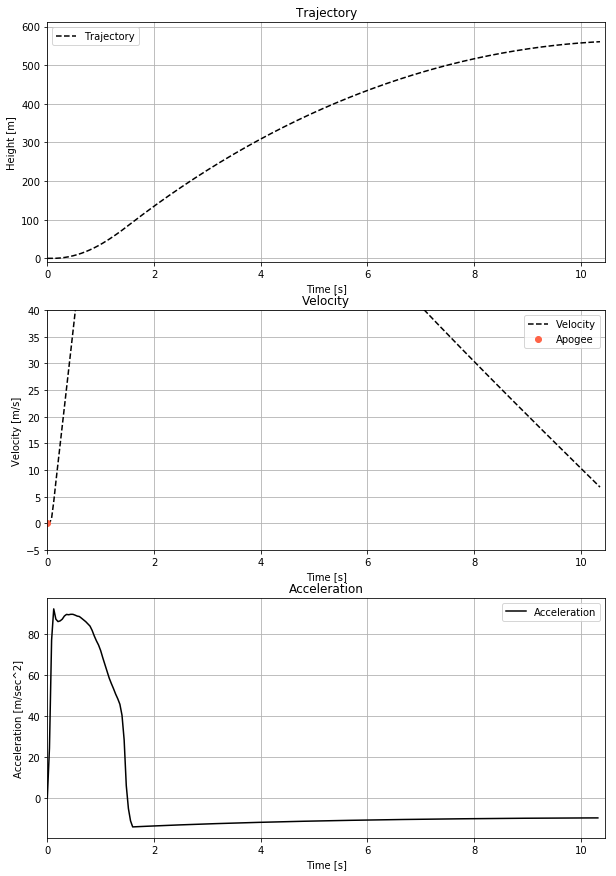

In [90]:
from matplotlib.pyplot import *
% matplotlib inline
# from numpy import *
# from astropy.io import ascii
import RocketSim as Sim

# following vals are for Dec. 8 TMH flight
dry_mass = 5.127
wet_motor = .650 # [kg]
propellant_mass = .35 # [kg]
dry_motor = wet_motor - propellant_mass
rocket_mass = dry_mass - dry_motor
print('rocket mass: ', rocket_mass)

# following vals are for Aerotech J420 
# (check: total thrust = 653)
# http://www.thrustcurve.org/simfilesearch.jsp?id=518

thrust_profile = 'ThrustData/J420_thrust.txt'
burn_time = 1.6 # from J420 thrustcurve page
t_apogee = 10   # approximately
freq = 25.      # [Hz]
t_start = 1     # time to deploy after MECO

plots = True    # want to plot data? (True=yes)
logfile = 'SimData.csv'


Sim.num_solver(thrust_profile, rocket_mass, dry_motor, propellant_mass, freq, burn_time, t_apogee, t_start, plots, logfile)

In [86]:
# to read data from CSV into lists
import pandas
df = pandas.read_csv('41dataTest.csv')    # data frame
simTime = df['time'].astype(np.float).values.tolist()
simAlt = df['altitude'].astype(np.float).values.tolist()
simVel = df['velocity'].astype(np.float).values.tolist()
simAcc = df['acceleration'].astype(np.float).values.tolist()